## The Sparks Foundation
## Intern Name : Yash Waghmare
## Data Science and Business Analytics
## Task 1 : Prediction using Supervised Learning
## Dataset : http://bit.ly/w-data
## Problem Statement : To predict the score of a student based on the number of study hours.

### Importing required libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Importing and Displaying dataset

In [8]:
student_data = pd.read_csv("http://bit.ly/w-data")
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Knowing your dataset

In [9]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the data

<AxesSubplot:>

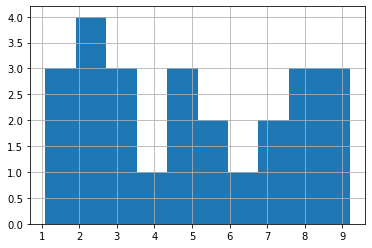

In [11]:
student_data.Hours.hist()#This will help us to known how hours values are spread

<AxesSubplot:>

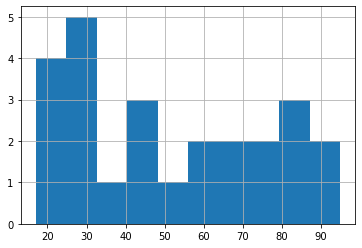

In [12]:
student_data.Scores.hist()

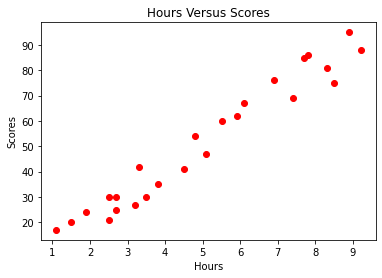

In [13]:
#Plotting the hours vs scores graph to get more insight on a data.
plt.scatter(x=student_data.Hours, y=student_data.Scores, c='red')
plt.title('Hours Versus Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Spliting the dataset for training and testing the model

In [14]:
#Storing data columns into arrays for further process
x = student_data.iloc[:, 0].values
y = student_data.iloc[:, 1].values

#splitting takes place
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print('X Training set', x_train)
print('X Test set', x_test)
print('Y Training set', y_train)
print('Y Test set', y_test)

X Training set [6.1 3.5 7.4 2.7 5.9 7.8 1.9 8.3 3.3 1.5 3.8 2.5 8.9 5.5 5.1 2.7 6.9 3.2
 9.2 7.7]
X Test set [4.5 4.8 2.5 1.1 8.5]
Y Training set [67 30 69 30 62 86 24 81 42 20 35 21 95 60 47 25 76 27 88 85]
Y Test set [41 54 30 17 75]


### Training the model

In [15]:
#reshaping need to be done
x_train = x_train.reshape(-1,1)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

#Using Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Visualization of training and test set

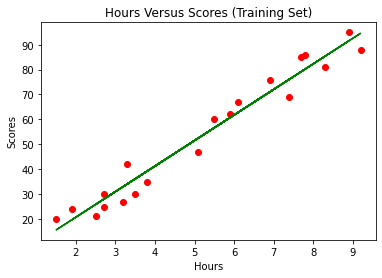

In [16]:
#for training set
plt.scatter(x = x_train, y = y_train, c='red')#plotting points
plt.plot(x_train, lr.predict(x_train), c='green')#plotting regression line
plt.title('Hours Versus Scores (Training Set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

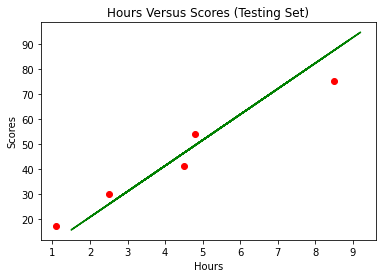

In [17]:
#for testing set
plt.scatter(x = x_test, y = y_test, c='red')#plotting points
plt.plot(x_train, lr.predict(x_train), c='green')#plotting regression line
plt.title('Hours Versus Scores (Testing Set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Making Prediction

In [18]:
y_pred = lr.predict(x_test) # Predicting the scores
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,41,46.372797
1,54,49.449287
2,30,25.862860
3,17,11.505904
4,75,87.392671


In [19]:
hours = np.array([9.25])
own_pred = lr.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 95.0838973699897


### Evaluating the model

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 6.389483341013526
